<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB1/blob/main/6351071072_LAB1_BAI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
print("Nguyễn Đức Trung - 6351071072")
print("câu 1 trang 5")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("titanic.csv")
print("Đã nhập dữ liệu thành công")
print("5 dòng dữ liệu đầu tiên")
print(df.head())
print("\n Thông tin tổng quan")
df.info()
print("\n Thống kê mô tả")
print(df.describe)

Nguyễn Đức Trung - 6351071072
Câu 1 trang 15
Đã nhập dữ liệu thành công
5 dòng dữ liệu đầu tiên
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500 

In [8]:
#câu 2
print("NguyenDucTrung-6351071072")
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100
missing_data_info = pd.DataFrame({
    'Total': null_counts,
    '%': null_percentages
})
top_5_missing = missing_data_info[missing_data_info['Total'] > 0].sort_values(
    by='Total', ascending=False).head(5)

print("\n--- 5 thuộc tính có số lượng giá trị rỗng nhiều nhất ---")
print(top_5_missing)

NguyenDucTrung-6351071072

--- 5 thuộc tính có số lượng giá trị rỗng nhiều nhất ---
           Total          %
body        1188  90.756303
cabin       1014  77.463713
boat         823  62.872422
home.dest    564  43.086325
age          263  20.091673


NguyenDucTrung_6351071072


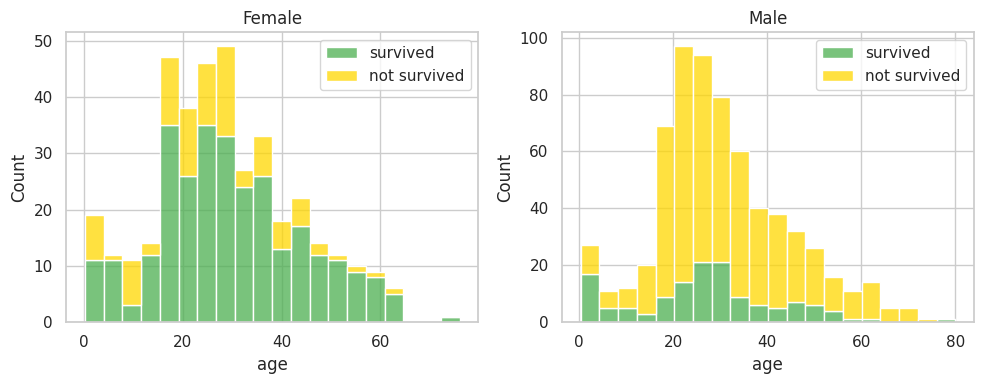

In [12]:
#câu 3
print("NguyenDucTrung_6351071072")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.set_palette(['#FFD700', '#4CAF50'])
sns.histplot(
    data=df[df['sex'] == 'female'].dropna(subset=['age']), # Lọc dữ liệu nữ và loại bỏ age rỗng
    x='age',
    hue='survived',
    bins=20, # Chọn số bins hợp lý
    multiple='stack', # Chồng lên nhau (hoặc 'layer' để không chồng)
    ax=axes[0]
)
axes[0].set_title('Female')
axes[0].legend(['survived', 'not survived'])

sns.histplot(
    data=df[df['sex'] == 'male'].dropna(subset=['age']), # Lọc dữ liệu nam và loại bỏ age rỗng
    x='age',
    hue='survived',
    bins=20, # Chọn số bins hợp lý
    multiple='stack',
    ax=axes[1]
)
axes[1].set_title('Male')
axes[1].legend(['survived', 'not survived'])
plt.tight_layout()
plt.show()

NguyenDucTrung_6351071072


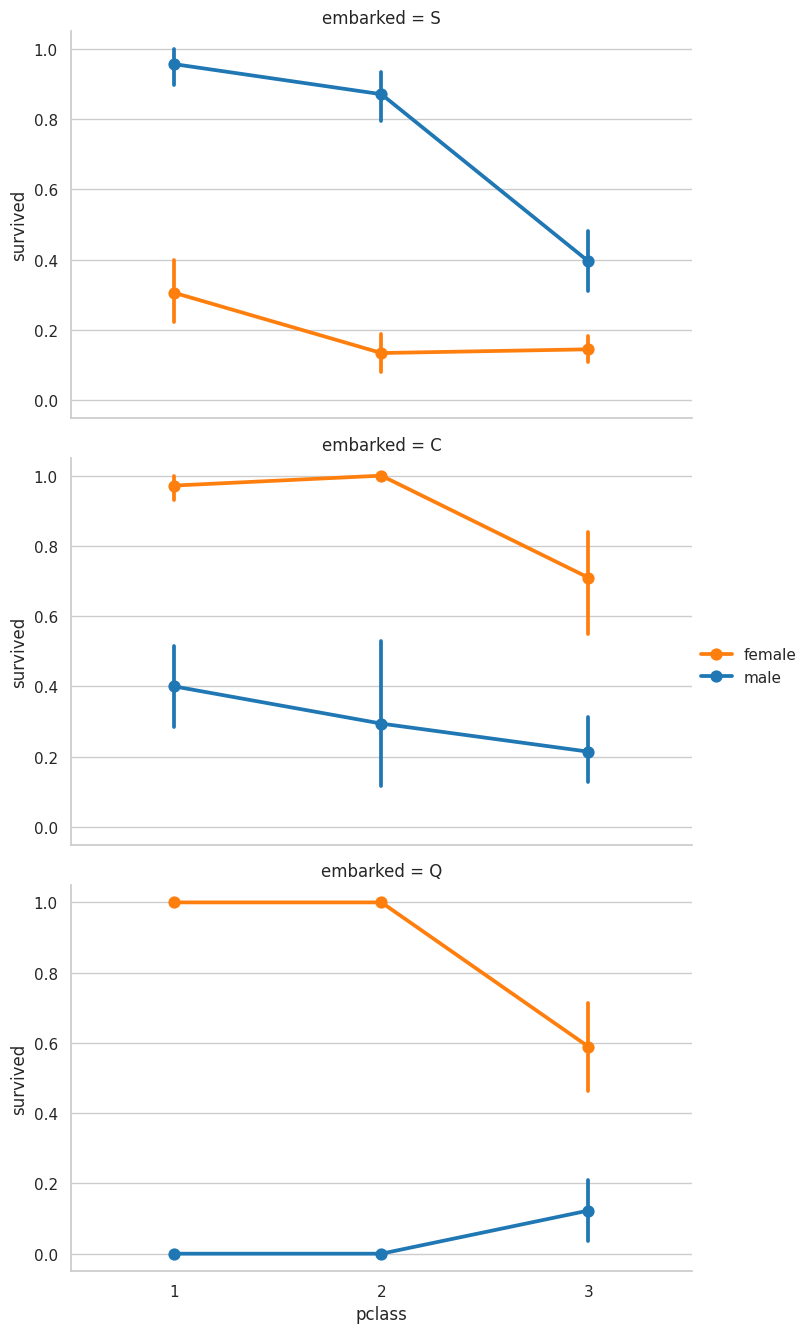

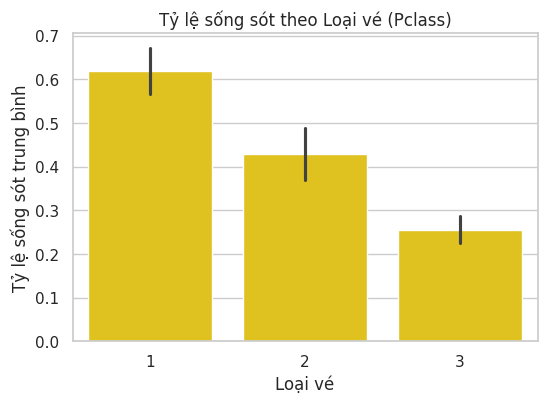

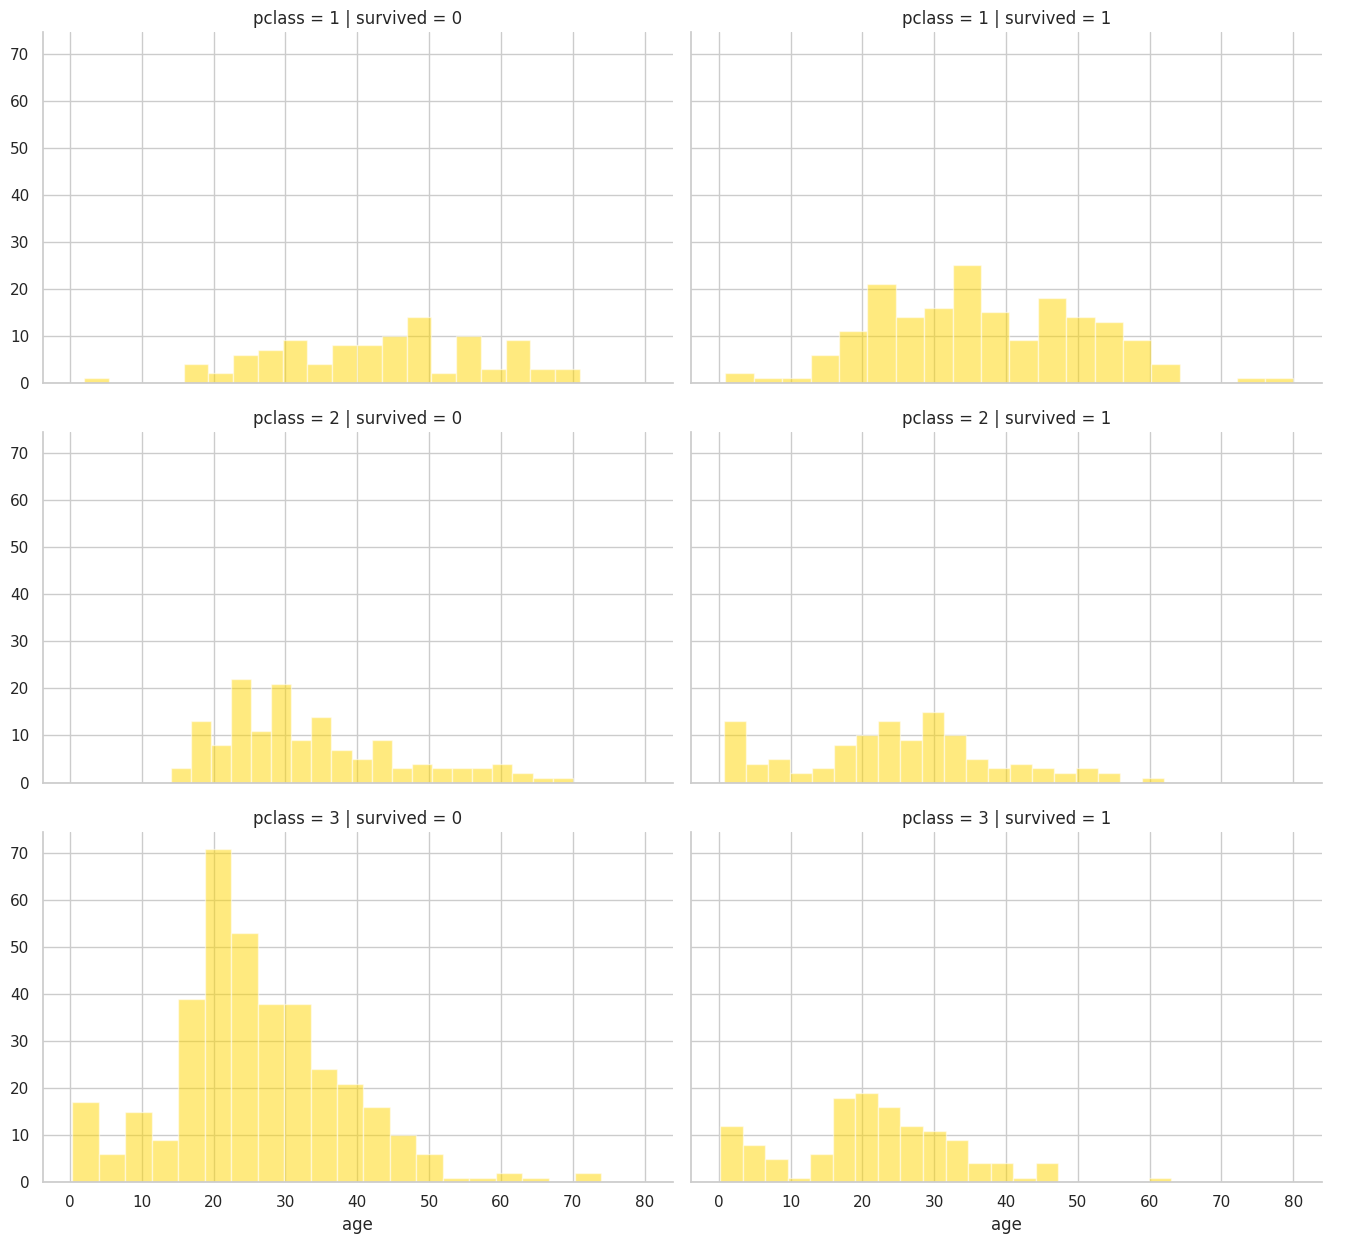

In [14]:
#câu 4
print("NguyenDucTrung_6351071072")
grid = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='tab10', order=None, hue_order=None)
grid.add_legend()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Tỷ lệ sống sót theo Loại vé (Pclass)')
plt.ylabel('Tỷ lệ sống sót trung bình')
plt.xlabel('Loại vé')
plt.show()

grid = sns.FacetGrid(df, col='survived', row='pclass', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();
plt.show()

NguyenDucTrung_6351071072

* Số người đi một mình (1): 790 người.
* Số người đi cùng người thân (0): 519 người.

--- Biểu đồ mối quan hệ giữa Relatives và Survived ---


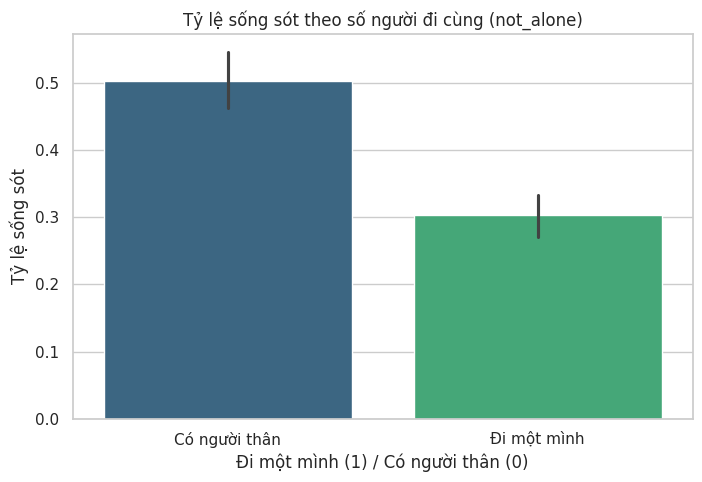

In [19]:
#câu 5
print("NguyenDucTrung_6351071072")
df['relatives'] = df['sibsp'] + df['parch']
df.loc[df['relatives'] > 0, 'not_alone'] = 0
df.loc[df['relatives'] == 0, 'not_alone'] = 1
df['not_alone'] = df['not_alone'].astype(int)

print("\n* Số người đi một mình (1):", df['not_alone'].value_counts()[1], "người.")
print("* Số người đi cùng người thân (0):", df['not_alone'].value_counts()[0], "người.")

print("\n--- Biểu đồ mối quan hệ giữa Relatives và Survived ---")
plt.figure(figsize=(8, 5))
sns.barplot(x='not_alone', y='survived', data=df, palette='viridis', hue='not_alone', legend=False)
plt.title('Tỷ lệ sống sót theo số người đi cùng (not_alone)')
plt.xlabel('Đi một mình (1) / Có người thân (0)')
plt.ylabel('Tỷ lệ sống sót')
plt.xticks([0, 1], ['Có người thân', 'Đi một mình'])
plt.show()

In [20]:
print("NguyenDucTrung_6351071072")

import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
df['cabin'] = df['cabin'].fillna('U0')
df['deck'] = df['cabin'].apply(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df['deck'] = df['deck'].map(deck)
df['deck'] = df['deck'].fillna(0)
df['deck'] = df['deck'].astype(int)
df.drop(['cabin'], axis=1, inplace=True)
print(df[['deck']].head())

columns_to_drop = ['ticket', 'body', 'boat', 'home.dest']
for col in columns_to_drop:
    if col in df.columns:
        df.drop([col], axis=1, inplace=True)
        print(f"Đã xóa thuộc tính: {col}")

NguyenDucTrung_6351071072
   deck
0     2
1     3
2     3
3     3
4     3
Đã xóa thuộc tính: ticket
Đã xóa thuộc tính: body
Đã xóa thuộc tính: boat
Đã xóa thuộc tính: home.dest
